**Regression** is method of predicting the relationship between a target variable(outcome, dependent variable, result variable) and one or more independent response variables(predictor's, independent variables) The most common statistical analysis is linear regression where there is a linear relationship explained by the model. We are working with Simple Linear Regression Model and understanding the statistics used in assessing the model prediction.

In [1]:
#importing libraries

#for reading data and plotting the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn is the most common statistical/machine learning library used, widely used in production code.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

#using the magic command to plot all plots inline/inside the notebook.
%matplotlib inline

In [2]:
#Reading the data into pandas dataframe object
data = pd.read_csv('.\Exploratory-Analysis\data\Advertising.csv')

In [3]:
# Displaying a sample from data set. As you can see the data has default indexing + an additional untitled column representing the actual index
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Rereading the data with index_col parameter
#index_col informs pandas dataframe object whether to use a index column by default or not. as we are giving 0, it means False - do not use it. 
data = pd.read_csv('.\Exploratory-Analysis\data\Advertising.csv', index_col=0)

In [5]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


The **objective** here is to understand how advertisement impacts Sales <br>

Few questions answered in below analysis: <br>

What is training and testing data ? <br>
How is linear regresion model used from sklearn library and model fit to the data ? <br>
What are some of the important features that can be used in predicting the Sales ? <br>
What are some of the metrics used for evaluation of the model ?

Some basic information about the data set

**Features/Independent Variables** 
<br>

*TV*: Amount of \\$ spent by giving ads on the TV as a communication medium and how are Sales affected <br>
*Radio* Amount of \\$ spent by giving ads on the Radio  <br>
*Newspaper*: Amount of \\$ spent by giving news paper based ads. <br>

**Target Variables** <br>

Sales: This would be the Sales number impacted due to different advertisements

**The model is fit means the parameters inside the model are estimated using the training data and these predicted parameter values are used in predicting the test data**

If we have to speak in terms of Hypothesis Testing:

Our 
Null Hypothesis: There is no relation between Sales figures and amount spent in advertisements via different mediums <br>
Alternative Hypothesis: There is a strong relation between Sales and TV,Radio and Newspaper ad spendings


In [6]:
data.shape

(200, 4)

In [7]:
# This method is to check if any columns return True boolean. If none return True, there are no NaN/Null values in dataframe

data.isnull().head()

,TV,radio,newspaper,sales
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False


In [8]:
# Supposedly if there was 1 entry in Sales with NaN

# Alogrithm
#    - Create a bool series of the NaN row using isnull functionality
#    - Seperate the NaN row and display it as dataframe
#    - Fill the missing value or drop it

# bool_series = pd.isnull(data['sales'])
# data[bool_series]

# to display the inverse of Null/NaN rows viz/i.e Not Null values
# This function would return True for all numerical values and False for NaN/Null values

# data.notnull()

# Similarly to show all non Nan/Null values

# Alogrithm
#    - Create a bool series of the non-NaN row using notnull functionality
#    - Seperate the non-NaN row and display it as dataframe

# bool_series = pd.notnull(data['sales'])
# data[bool_series]

In [9]:
# for Filling missing values we use fillna, replace and interpolate functions

# Filling missing values with 1 value - data.fillna(0)
# Filling null values with previous one - data.fillna(method = 'pad')
# Filling null values with next ones data.fillna(method = 'bfill')
# Filling with a spefic text value data['sales'].fillna('No Value', inplace=True)
# Replacing a NaN value throughout data.replace(to_replace = np.nan,value = 0)
# Dropping rows with atleast 1 NaN in any column data.dropna() 

## Visualizing the data using seaborn

**Seaborn** is a tool built upon Matplotlib and used for visualizing. Seaborn cann be installed by using pip or conda install

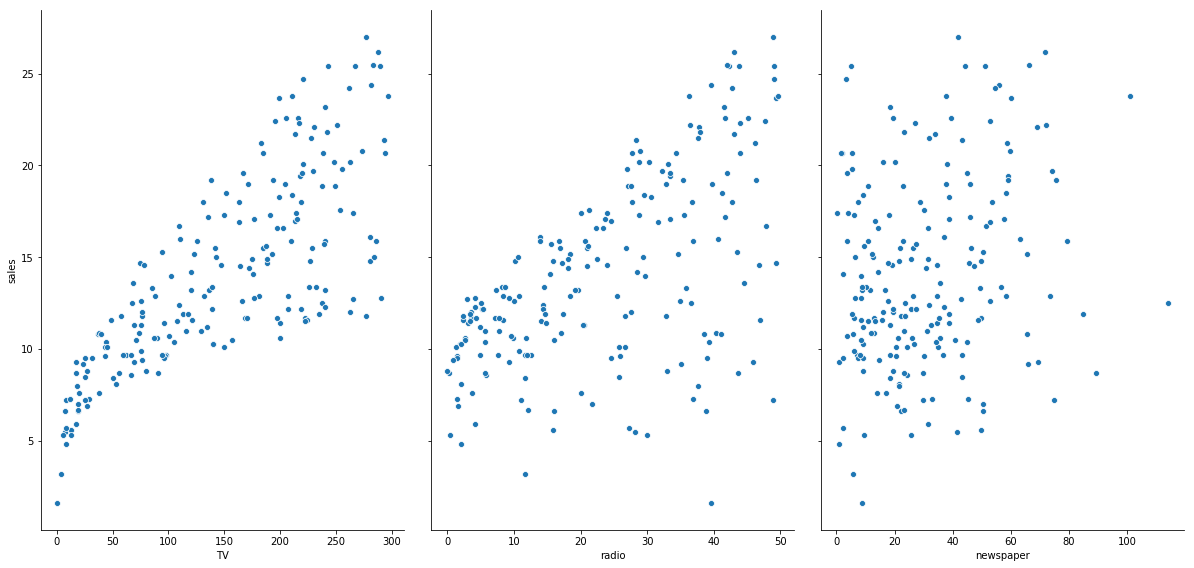

In [10]:
sns.pairplot(data, x_vars = ['TV', 'radio', 'newspaper'], y_vars = ['sales'], height=8, aspect =0.7)

**Linear Regression**

Assumptions
    1. A linear relationship between the predictors and response variable.
    2. No multicollinearity between predictor variables.
    3. Response variable is normally distributed. Check for any pattterns in Residual plots.

Pros: It is well understood, requires no tuning parameters, highly interpretable


The equation is given as:<br>
$y_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + e_i$

where

$ y_i$ = Target/Response variable <br>
$ \beta_i $= is the Coefficient of each Predictor variable  <br>
$ \beta_0 $= is the intercept <br>
$ e_i$ = residual error 

Population Regression Line coefficient estimates would be the same as sample regression line

In this case

$y_i  = \beta_0 + \beta_1 * TV + \beta_2 * radio + \beta_3 * newspaper $ 

The beta's are model coefficients. These are estimated by fitting the model to training data using OLS (Ordinary Least Squares) criterion. As per OLS, the goal is to minimize the residual sum of square errors. Then the fitted model is used to do the predictions. 


$ SS_{residuals} = \sum_{i=1}^{N} (\hat{y} - y)^2 $ - Minizime square of sum of residuals

In [11]:
# Seperating the features and response variable - Creating a names list
# Create X and Y

# features
X = ['TV','radio','newspaper']
# response
Y = ['sales']
df_x = data[X]
df_y = data[Y]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(df_x,df_y,test_size = 0.25)

### Few questions the data set can answer

1. Is there a relationship between the ads and sales ?
2. How strong is the relationship ?
3. What ad types contribute to the sales ?
4. Effect of each tyoe of add on sales ?
5. Given ad figues, can sales be predicted ?

In [13]:
# instantiate and fit the model
model = LinearRegression().fit(X_train,Y_train)

In [14]:
# model intercept beta-0
model.intercept_

array([2.89980966])

In [15]:
# model coefficients
model.coef_

array([[0.04561606, 0.180128  , 0.00512011]])

Let's interpret the model coefficients

Interpreting model coefficient for TV ($ \beta_1$)

If we increase by \\$1 the TV advertising, the Sales would increase by 0.0462 units<br>
That is to say if increase by \\$1000 the TV advertising, given constant figures for radio and newspaper, Sales would be up by 46 units approximately

The predict equation becomes like <br> $ y_{sales} = 2.939 + 0.0462 *  x_{TV} $

In [16]:
Y_predictions = model.predict(X_test)

Let's evaluate the metrics in the regression like Mean Square Error (MSE), Mean Absolute Error (MAE) and Root Meas Square Error (RMSE)

Mean Absolute Error (MAE) = Mean of the absolute errors, simplest to understand <br>

MAE = $ \frac{1}{n}\sum_{i=1}^{N}|y - \hat{y}| $ <br>

Mean Squared Error (MSE) = Most popular one, this punishes larger errors <br>

MSE = $ \frac{1}{n} \sum_{i=1}^{N} (y - \hat{y})^2 $ <br>

Root Mean Squared Error (RMSE) = Even more popular, as this gives square root i.e results in y variable units

In [17]:
mae = metrics.mean_absolute_error(Y_test,Y_predictions)

In [18]:
# mean absolute error
mae

1.1629879013154016

In [19]:
# mean square error
mse = metrics.mean_squared_error(Y_test,Y_predictions)
mse

1.9776001271050894

In [20]:
# root mean square error
rmse= np.sqrt(mse)
print('Root Mean Squared Error {}'.format(rmse))

Root Mean Squared Error 1.4062717116919794


In [21]:
# r_square = variablity explained by model
# r2 = (TSS-RSS)/TSS
# TSS - Total Variability of the response variable
# RSS - Variability remained unexplained by the model. 
# Standard deviaion of the irreducable error ( RSE = sqrt (RSS/(n-2)))
print('R2_Score {}'.format(metrics.r2_score(y_true = Y_test,y_pred = Y_predictions)))

R2_Score 0.9287022539436531


In [22]:
# Assumption Test: Mean of the residuals should be zero. residuals are normall distributed with 0 mean and sigma sd
model = LinearRegression().fit(df_x,df_y)
y_pred = model.predict(df_x)
res = df_y.values - y_pred
np.mean(res)

-1.1013412404281553e-15

In [23]:
# Assumption Test: Mean of the residuals should be zero. residuals are normall distributed with 0 mean and sigma sd

residuals = np.array(Y_test - Y_predictions)
print('Mean of residuals {}'.format(np.mean(residuals)))

Mean of residuals 0.2730129661181852


**Check for Homosckedasticity**

Homodsckedasticity is equal or near to equal variance across the residuals on regrssion line. By plotting the residuals against the fitted values, we can detect if there is any pattern in the residuals

***Detecting Heterosckedasticity*** <br>
Graphical Method: If there is a definite pattern in error terms (like linear or quadratic) then heterosckedasticity is present.

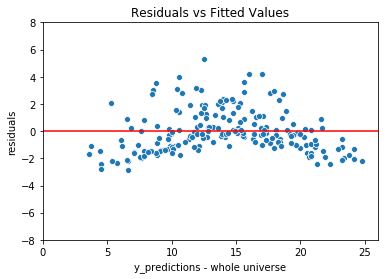

In [52]:
res_df = pd.DataFrame(data = residuals[:,0], columns = ['residuals'])
res =  y_pred[:,0] - df_y['sales']
p = sns.scatterplot(Y_pred['sales'], res)
plt.xlim(0,26)
plt.ylim(-8,8)
plt.xlabel("y_predictions - whole universe")
plt.ylabel("residuals")
plt.title("Residuals vs Fitted Values")
sns.lineplot([0,26],[0,0],color="red")

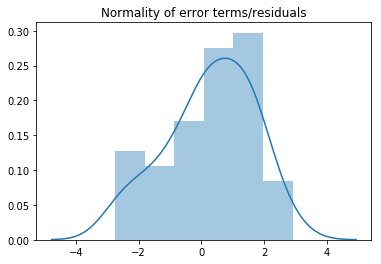

In [53]:
# Normality of residuals

p = sns.distplot(residuals,kde="normal")
p = plt.title('Normality of error terms/residuals')

We can see a minor skew towards right side. Central Limit Theorem states that 
more number of samples are taken or higher data sample is taken then the mean of variables come close to population mean

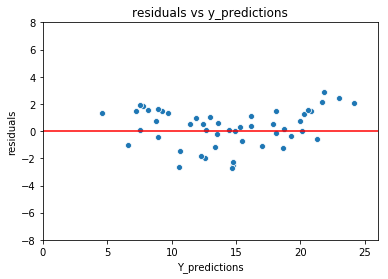

In [66]:
p = sns.scatterplot(Y_predictions[:,0],residuals[:,0])
plt.xlim(0,26)
plt.ylim(-8,8)
plt.xlabel("Y_predictions")
plt.ylabel("residuals")
plt.title("residuals vs y_predictions")
p= sns.lineplot([0,26],[0,0],color="red")

Autocorrelation of residuals

When residuals are autocorrelated, it explains 
that there would be a pattern in y/target variable which has come forward in residuals. 
Autocorrelation is how current residual value is derived from previous values. 
Previous values hold information about current value  

In [70]:
predicted_values = Y_predictions[:,0]
residuals = residuals [:,0]

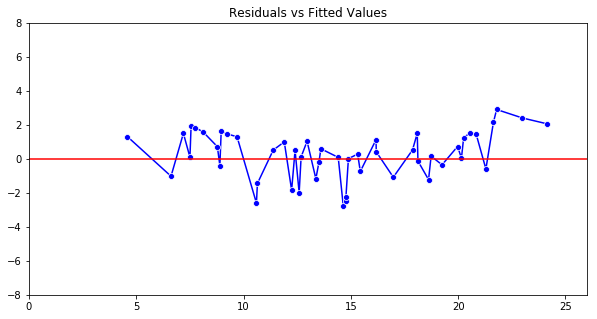

In [73]:
plt.figure(figsize= (10,5))
p = sns.lineplot(predicted_values, residuals, marker = 'o', color = "blue")
plt.xlim(0,26)
plt.ylim(-8,8)
plt.title("Residuals vs Fitted Values")
p = sns.lineplot([0,26],[0,0],color = "red")

In [76]:
import statsmodels.api as sm 

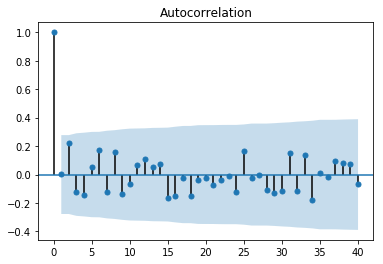

In [78]:
sm.graphics.tsa.plot_acf(residuals,lags= 40)
plt.show()

S:\Anaconda\Anaconda\envs\py35\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


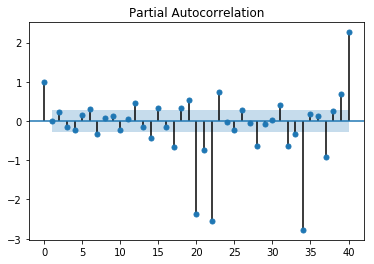

In [80]:
sm.graphics.tsa.plot_pacf(residuals,lags= 40)
plt.show()

ACF : Auto Correlation Function would show how far in past/lags be used in predicting current/next value. 
The problem here is multicollineearity amongst past values so we cannot determine exact lags useful without multicollinearity
that should be used in detecting/predicting the next value in timeseries.

PACF : PACF explains remaining effect by considering residuals instead of actual timeseries. Therefore, pacf eliminates the effect already explained in auto regressive AR and determines p lags


https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8 <br>
ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. We plot these values along with the confidence band and tada! We have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values. A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while finding correlations hence it’s a ‘complete auto-correlation plot’.

PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation. So if there is any hidden information in the residual which can be modeled by the next lag, we might get a good correlation and we will keep that next lag as a feature while modeling. Remember while modeling we don’t want to keep too many features which are correlated as that can create multicollinearity issues. Hence we need to retain only the relevant features.



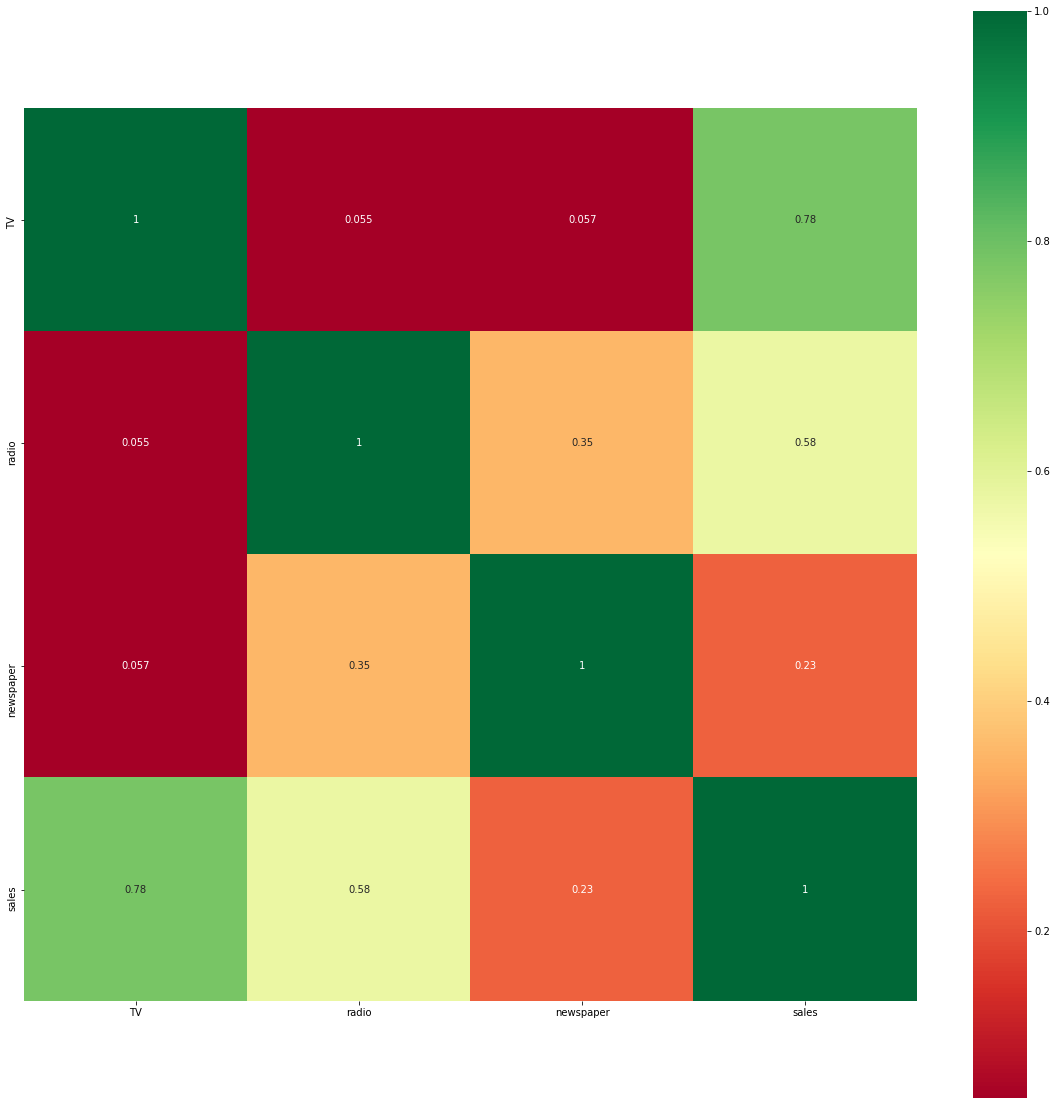

In [82]:
#Multicollinearity
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn", square = True)

We look for correlation among independent variables. But as we see here there is no prefect multicollinearity amongst
independent variables.

If primary goal is predictions, then we dont need to understand severe effects of multicollinearity. 
Multicolloinearity create overfitting models, thus high variance models. 
It affects the coefficients and p-values but not precision of predictions.

Final Reference has been taken from this Notebook: https://www.kaggle.com/shrutimechlearn/step-by-step-assumptions-linear-regression